# **----------------**>**ADVERTISING IMPACT ON SALES PREDICTION**<**----------------**

# 1. Import Necessary Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


# 2. Load the Dataset

In [70]:
# Load the dataset
data = pd.read_csv(r"D:\# DATA SCIENCE\# PROJECTS\- PROJECTS INTERNSHIPS\CODEALPHA - DATA SCIENCE\Sales Prediction using Python Project\Advertising.csv")

# Display the first few rows of the dataset
print(data.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


# 3. Data Cleaning and Exploration



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Descriptive Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

Missing values in each column:
 TV           0
Radio        0
Newspaper    0
Sales  

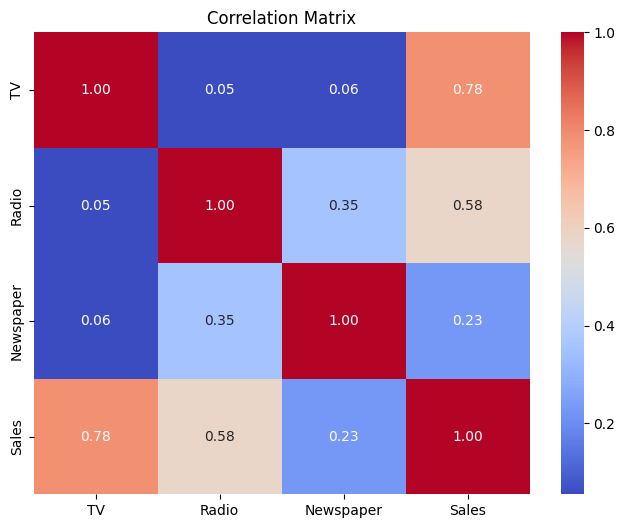

In [71]:
# Data Cleaning and Exploration
print("\nDataset Info:")
print(data.info())

print("\nDescriptive Statistics:")
print(data.describe())

# Check for Missing Values
print("\nMissing values in each column:\n", data.isnull().sum())

# Data Cleaning: Handling Missing Values
# Option 1: Remove rows with missing values (if any)
data_cleaned = data.dropna()

# Option 2: Fill missing values with the mean (or median) of the column
# data_cleaned = data.fillna(data.mean())

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# 4. Check for Missing Values

In [72]:
# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())



Missing values in each column:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# 5.Feature selection 

In [73]:
# Feature selection and scaling
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame from the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


# 7. Split the Data

In [74]:
# 7. Split the Data

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# 8. Initialize and Train the Model

In [75]:
# Initialize the Random Forest Regressor model
model.fit(X_train, y_train)  # Use the scaled features here

# Train the model using the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# 9. Make Predictions

In [76]:
# Make predictions on the test data
y_pred = model.predict(X_test)


# 10. Evaluate the Model

In [77]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Corrected RMSE calculation

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 0.7686509285755133
R-squared (R2): 0.9812814645037053


# 11. Plotting the Results

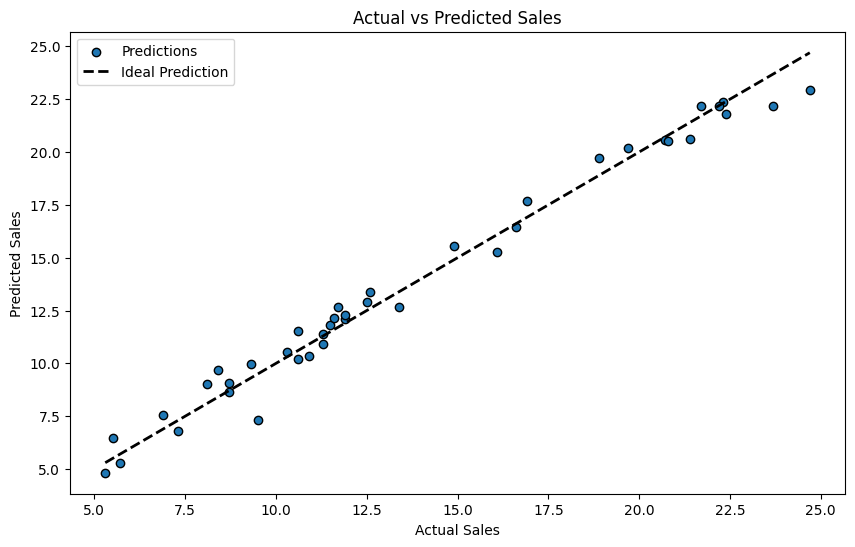

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# 1. Scatter Plot of Actual vs. Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0), label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

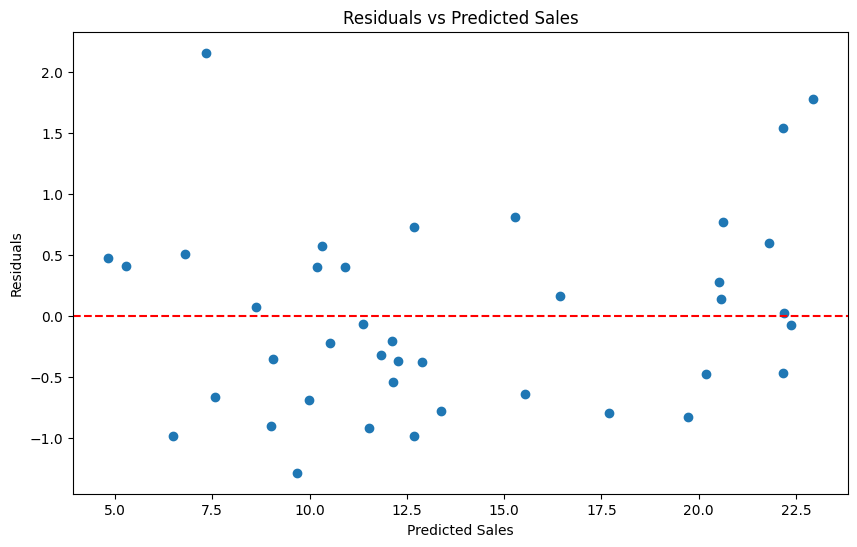

In [79]:
# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')
plt.show()

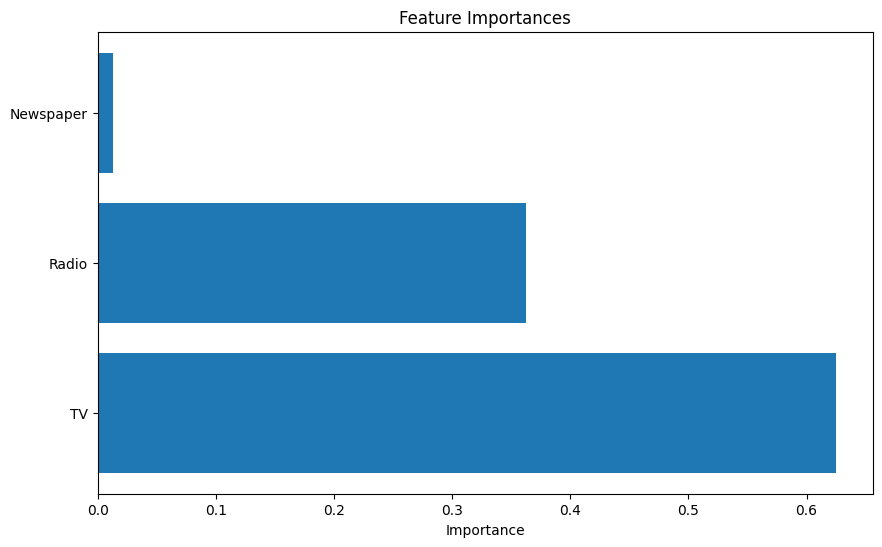

In [80]:
# 3. Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(X_scaled_df.shape[1]), importances[indices], align='center')
plt.yticks(range(X_scaled_df.shape[1]), np.array(X_scaled_df.columns)[indices])
plt.xlabel('Importance')
plt.show()

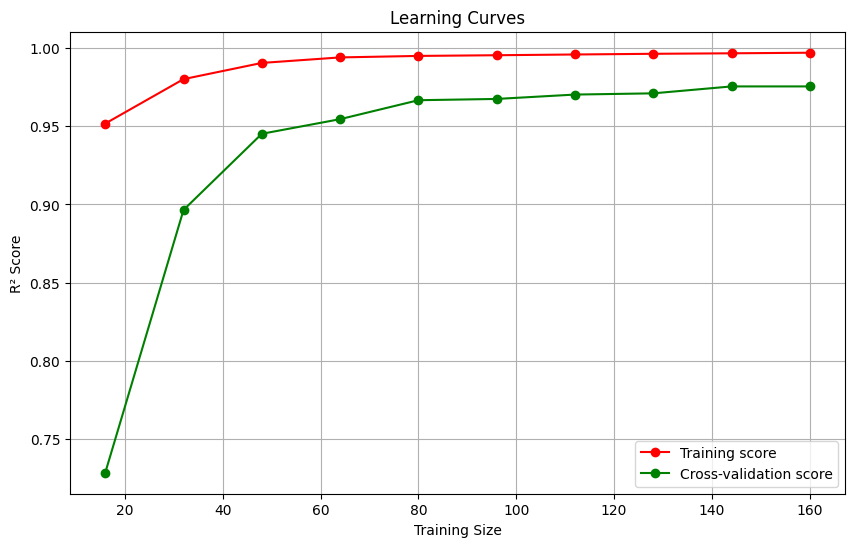

In [81]:
# 4. Learning Curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled_df, y, cv=5, scoring='r2', 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid()
plt.show()